<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Independent Practice

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Walmart Sales Data

For this independent practice, we'll analyze Walmart's weekly sales data over a two-year period from 2010 to 2012.

The data set is again separated by store and department, but we'll focus on analyzing one store for simplicity.

The data include:

* `Store`: The store number.
* `Dept`: The department number.
* `Date`: The week.
* `Weekly_Sales`: Sales for the given department in the given store.
* `IsHoliday`: Whether the week is a special holiday week.

### 1) Preprocess the data using Pandas.

* **Load the data.**
* **Convert the `Date` column to a `datetime` object.**
* **Set `Date` as the index of the DataFrame.**

In [19]:
walmart = pd.read_csv('./datasets/walmart.csv')

In [20]:
walmart.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [21]:
walmart['Date'] = pd.to_datetime(walmart.Date)
#walmart.set_index('Date', inplace=True)
#walmart.head()

### 2) Filter the DataFrame to Store 1 sales and aggregate over departments to compute the total weekly sales per store. Store this in a new DataFrame.

In [26]:
store1 = walmart[walmart['Store']==1].copy()

In [27]:
store1 = pd.DataFrame(store1.groupby(['Date']).Weekly_Sales.sum())

In [28]:
store1.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


### 3) Plot the rolling mean for `Weekly_Sales`. What general trends do you observe?

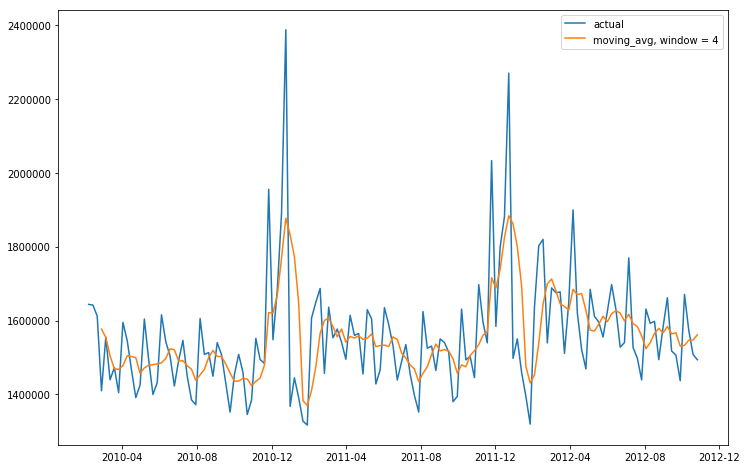

In [60]:
window = 4

plt.figure(figsize=(12,8))
plt.plot(store1, label='actual')
plt.plot(store1.rolling(window=window).mean(), label='moving_avg, window = {}'.format(window))
plt.legend()
plt.show()

### 4) Compute the `1`, `13`, and `52` autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

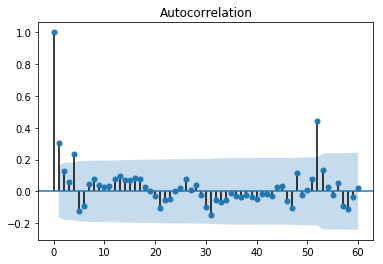

In [44]:
plot_acf(store1, lags=60);

### 5) Create a decomposition plot for the Store 1 sales data. 

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

''

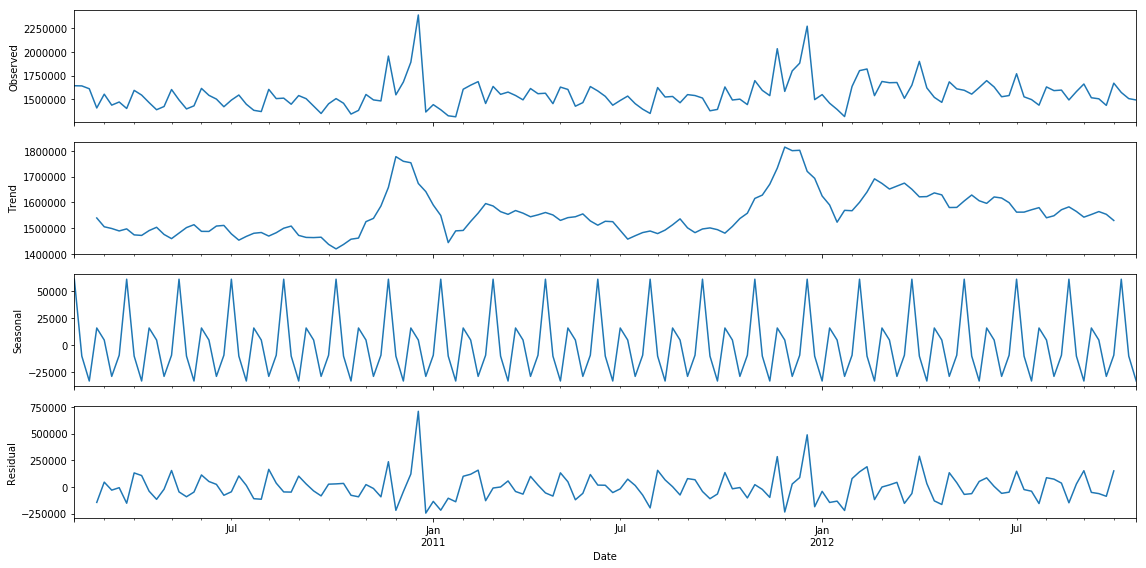

In [69]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)
result = seasonal_decompose(store1, freq=7)
result.plot()
;

### 6) Based on the analyses above, what can we deduce about this time series?

- There is a yearly (52 day) seasonality
- Trend is increasing overtime